<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Jobs_DatasScicence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [345]:
test = pd.read_csv(r'/content/aug_test.csv')

train = pd.read_csv(r'/content/aug_train.csv')

sample = pd.read_csv(r'/content/sample_submission.csv')

In [346]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [347]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [348]:
train.drop(['enrollee_id', 'city', 'city_development_index'], axis=1, inplace=True)

In [349]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [350]:
train.duplicated().sum()
train.drop_duplicates(inplace=True)

In [351]:
train.gender.value_counts()

Male      12961
Female     1236
Other       191
Name: gender, dtype: int64

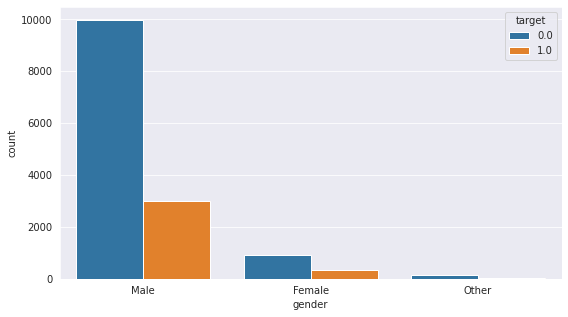

In [352]:
plt.figure(figsize=(9,5))

sns.countplot(x='gender', hue='target', data=train)

In [353]:
from scipy.stats import mode

train.gender.isna().sum()

mode(train.gender)

train.gender.replace(np.nan, 'nan', inplace=True)

In [354]:
train.gender.isna().sum()

0

In [355]:
train.gender.replace('nan', 'Male', inplace=True)

In [356]:
train.gender.value_counts()

Male      17453
Female     1236
Other       191
Name: gender, dtype: int64

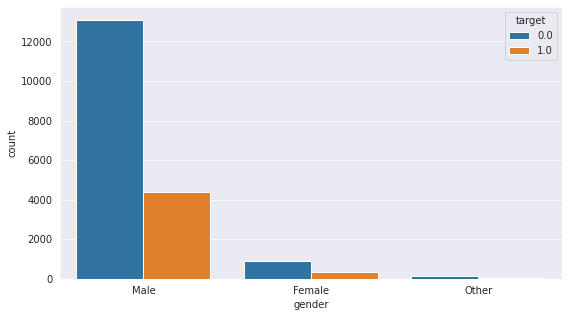

In [357]:
plt.figure(figsize=(9,5))

sns.countplot(x='gender', hue='target', data=train)
plt.show()

In [358]:
test.gender.replace(np.nan, 'nan', inplace=True)

In [359]:
mode(test['gender'])

ModeResult(mode=array(['Male'], dtype=object), count=array([1460]))

In [360]:
test.gender.replace('nan', 'Male', inplace=True)

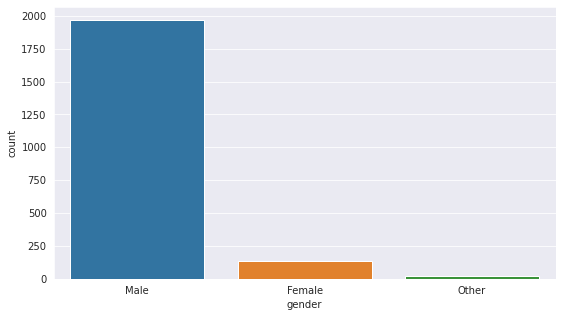

In [361]:
plt.figure(figsize=(9,5))

sns.countplot(x='gender', data=test)
plt.show()

In [362]:
train['relevent_experience'].value_counts()

Has relevent experience    13582
No relevent experience      5298
Name: relevent_experience, dtype: int64

In [363]:
train['relevent_experience'].isna().sum(), test['relevent_experience'].isna().sum()

(0, 0)

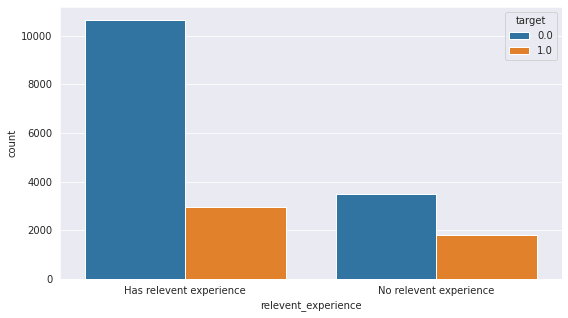

In [364]:
plt.figure(figsize=(9,5))

sns.countplot(x='relevent_experience', data=train, hue='target')
plt.show()

In [365]:
test['relevent_experience'].value_counts()

Has relevent experience    1524
No relevent experience      605
Name: relevent_experience, dtype: int64

In [366]:
train['enrolled_university'].value_counts()

no_enrollment       13583
Full time course     3714
Part time course     1198
Name: enrolled_university, dtype: int64

In [367]:
train['enrolled_university'].isna().sum(), test['enrolled_university'].isna().sum()

(385, 31)

In [368]:
mode(train['enrolled_university']), mode(test['enrolled_university'])

(ModeResult(mode=array(['no_enrollment'], dtype=object), count=array([13583])),
 ModeResult(mode=array(['no_enrollment'], dtype=object), count=array([1519])))

In [369]:
train['enrolled_university'].replace(np.nan, 'nan', inplace=True)
test['enrolled_university'].replace(np.nan, 'nan', inplace=True)

In [370]:
train['enrolled_university'].replace('nan', 'no_enrollment', inplace=True)
test['enrolled_university'].replace('nan', 'no_enrollment', inplace=True)

In [371]:
train['enrolled_university'].value_counts(), test['enrolled_university'].value_counts()

(no_enrollment       13968
 Full time course     3714
 Part time course     1198
 Name: enrolled_university, dtype: int64, no_enrollment       1550
 Full time course     435
 Part time course     144
 Name: enrolled_university, dtype: int64)

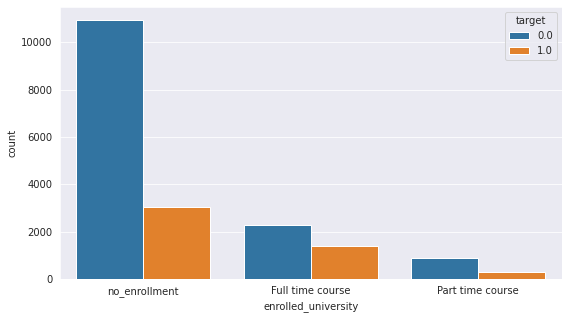

In [372]:
plt.figure(figsize=(9,5))

sns.countplot(x='enrolled_university', data=train, hue='target')
plt.show()

In [373]:
test['enrolled_university'].isna().sum(), train['enrolled_university'].isna().sum()

(0, 0)

In [374]:
train.head(2)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [375]:
train['education_level'].isna().sum(), test['education_level'].isna().sum()

(459, 52)

In [376]:
mode(train['education_level']), mode(test['education_level'])

(ModeResult(mode=array(['Graduate'], dtype=object), count=array([11407])),
 ModeResult(mode=array(['Graduate'], dtype=object), count=array([1269])))

In [377]:
train['education_level'].replace(np.nan, 'Graduate', inplace=True)
test['education_level'].replace(np.nan, 'Graduate', inplace=True)

In [378]:
train['education_level'].isna().sum(), test['education_level'].isna().sum()

(0, 0)

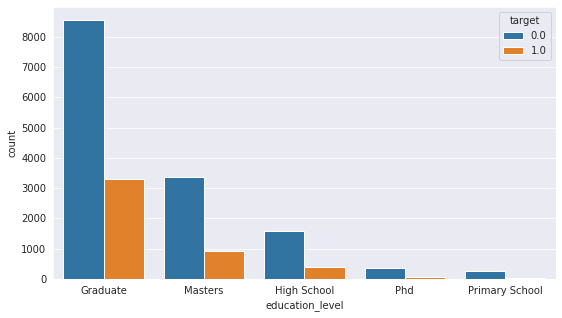

In [379]:
plt.figure(figsize=(9,5))

sns.countplot(x='education_level', data=train, hue='target')
plt.show()

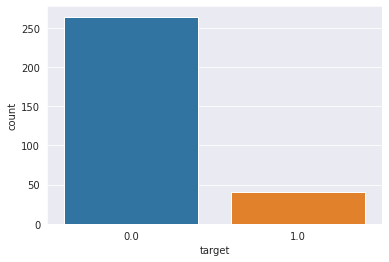

In [380]:
sns.countplot(x='target', data=train[train['education_level'] == 'Primary School'])

In [381]:
test['education_level'].value_counts()

Graduate          1321
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [382]:
train['major_discipline'].isna().sum(), test['major_discipline'].isna().sum()

(2774, 312)

In [383]:
mode(train['major_discipline']), mode(test['major_discipline'])

(ModeResult(mode=array(['STEM'], dtype=object), count=array([14253])),
 ModeResult(mode=array(['STEM'], dtype=object), count=array([1621])))

In [384]:
train['major_discipline'].replace(np.nan, 'STEM', inplace=True)
test['major_discipline'].replace(np.nan, 'STEM', inplace=True)

In [385]:
train['major_discipline'].isna().sum(), test['major_discipline'].isna().sum()

(0, 0)

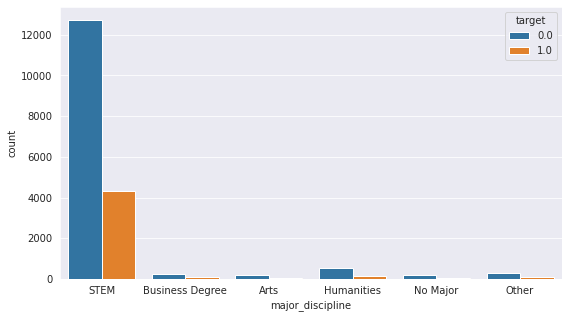

In [386]:
plt.figure(figsize=(9,5))

sns.countplot(x='major_discipline', data=train, hue='target')
plt.show()

In [387]:
test['major_discipline'].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [388]:
train['experience'].unique()

# Experience run of 0 to 20

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [389]:
a = [20,15,5,1,11,13,7,17,2,16,1,4,10,14,18,19,12,3,6,9,8,20,0]
b = ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', np.nan]
for i, j in zip(a, b):

  train['experience'].replace(j,i, inplace=True)

In [390]:
np.mean(train['experience'])

# mean equal to 10

9.864141949152541

In [391]:
train['experience'].replace(0,10, inplace=True)

In [392]:
train['experience'].value_counts()

20.0    3280
5.0     1417
4.0     1384
3.0     1338
6.0     1207
2.0     1105
1.0     1068
10.0    1047
7.0     1019
9.0      975
8.0      798
15.0     677
11.0     661
14.0     583
16.0     506
12.0     493
13.0     398
17.0     341
19.0     303
18.0     280
Name: experience, dtype: int64

In [393]:
test['experience'].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [394]:
a = ['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', np.nan, '17', '18', '12']

b = [9,5,1,11,20,10,14,3,20,8,4,13,2,6,7,1,19,15,16,0,17,18,12]

for i,j in zip(a,b):

  test['experience'].replace(i,j,inplace=True)

In [395]:
test['experience'].unique()

array([ 9,  5,  1, 11, 20, 10, 14,  3,  8,  4, 13,  2,  6,  7, 19, 15, 16,
        0, 17, 18, 12])

In [396]:
np.mean(test['experience'])

9.936120244246124

In [397]:
test['experience'].replace(0,10, inplace=True)

In [398]:
test['experience'].isna().sum(), test['experience'].dtype

(0, dtype('int64'))

In [399]:
train['experience'].isna().sum(), train['experience'].dtype



(0, dtype('float64'))

In [400]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0.0
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1.0,NaN,Pvt Ltd,never,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,0.0


In [401]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [402]:
train['company_size'].isna().sum()

5821

In [403]:
mode(train['company_size'])

ModeResult(mode=array(['50-99'], dtype=object), count=array([3048]))

In [404]:
train['company_size'].replace(np.nan, '50-99', inplace=True)

In [405]:
train['company_size'].isna().sum()

0

In [406]:
train['company_size'].replace('10/49', '10-49', inplace=True)

In [407]:
train['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10-49',
       '100-500', '500-999'], dtype=object)

In [408]:
test['company_size'].unique()

array(['<10', nan, '10/49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

In [409]:
mode(test['company_size'])

ModeResult(mode=array(['50-99'], dtype=object), count=array([338]))

In [410]:
test['company_size'].replace(np.nan, '50-99', inplace=True)

In [411]:
test['company_size'].replace('10/49', '10-49', inplace=True)

In [412]:
test['company_size'].unique()

array(['<10', '50-99', '10-49', '10000+', '100-500', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

In [413]:
test['company_size'].isna().sum()

0

In [414]:
train['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [415]:
 	 	

train.drop('company_type', axis=1, inplace=True)
test.drop('company_type', axis=1, inplace=True)

train.drop('last_new_job', axis=1, inplace=True)
test.drop('last_new_job', axis=1, inplace=True)

In [416]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,83,0.0
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1.0,50-99,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,8,0.0


In [417]:
train['training_hours'].isna().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; y

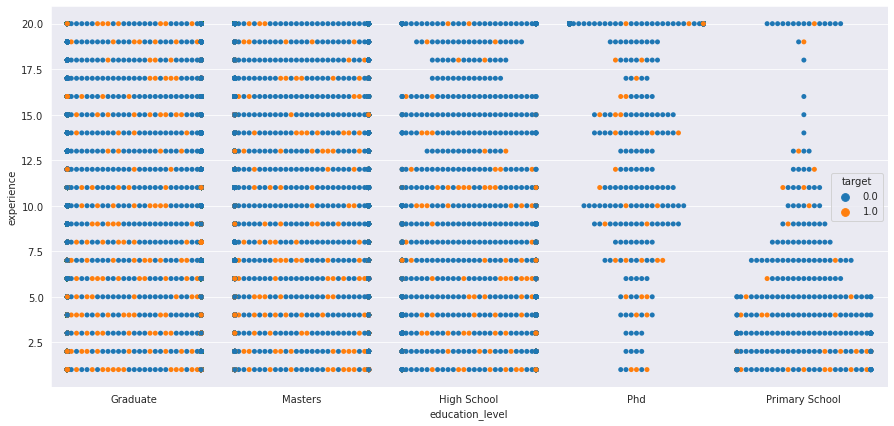

In [418]:
plt.figure(figsize=(15,7))

sns.swarmplot(x='education_level', y='experience', hue='target', data=train)
plt.show()

In [419]:
test.drop('enrollee_id', axis=1, inplace=True)
test.drop('city_development_index', axis=1, inplace=True)
test.drop('city', axis=1, inplace=True)

In [420]:
len(train.columns), len(test.columns)

(9, 8)

In [421]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,36,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,47,0.0
2,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,83,0.0
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1.0,50-99,52,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,8,0.0


In [422]:
train['relevent_experience'].replace('Has relevent experience', 1, inplace=True)
train['relevent_experience'].replace('No relevent experience', 0, inplace=True)

test['relevent_experience'].replace('Has relevent experience', 1, inplace=True)
test['relevent_experience'].replace('No relevent experience', 0, inplace=True)

In [423]:
train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [424]:
train['enrolled_university'].replace('Full time course', 0, inplace=True)
train['enrolled_university'].replace('Part time course', 1, inplace=True)
train['enrolled_university'].replace('no_enrollment', 2, inplace=True)

test['enrolled_university'].replace('Full time course', 0, inplace=True)
test['enrolled_university'].replace('Part time course', 1, inplace=True)
test['enrolled_university'].replace('no_enrollment', 2, inplace=True)

In [425]:
train['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [426]:
for i, j in enumerate(['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']):

  train['education_level'].replace(j, i, inplace=True)
  test['education_level'].replace(j, i, inplace=True)

In [427]:
train['education_level'].unique()

array([2, 3, 1, 4, 0])

In [428]:
train.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
0,Male,1,2,2,STEM,20.0,50-99,36,1.0
1,Male,0,2,2,STEM,15.0,50-99,47,0.0
2,Male,0,0,2,STEM,5.0,50-99,83,0.0
3,Male,0,2,2,Business Degree,1.0,50-99,52,1.0
4,Male,1,2,3,STEM,20.0,50-99,8,0.0


In [429]:
train['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [430]:
for i, j in enumerate(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other']):

  train['major_discipline'].replace(j, i, inplace=True)
  test['major_discipline'].replace(j, i, inplace=True)

In [431]:
train['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10-49',
       '100-500', '500-999'], dtype=object)

In [432]:
for i, j in enumerate(['<10','10-49','50-99','100-500','500-999','1000-4999','5000-9999','10000+']):

  train['company_size'].replace(j, i, inplace=True)
  test['company_size'].replace(j, i, inplace=True)

In [433]:
train.head(2)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
0,Male,1,2,2,0,20.0,2,36,1.0
1,Male,0,2,2,0,15.0,2,47,0.0


In [434]:
test.head(2)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours
0,Male,1,0,2,0,9,0,21
1,Female,1,2,2,0,5,2,98


In [435]:
train.drop('gender', axis=1, inplace=True)
test.drop('gender', axis=1, inplace=True)

In [436]:
train.isna().sum()

relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
training_hours         0
target                 0
dtype: int64

In [437]:
train.dropna(inplace=True)

In [438]:
test.isna().sum()

relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
training_hours         0
dtype: int64

In [439]:
for i in test.columns:

  train[i] = train[i].astype('int16')
  test[i] = test[i].astype('int16')

In [440]:
train['target'] = train['target'].astype('int16')

In [441]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18880 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   relevent_experience  18880 non-null  int16
 1   enrolled_university  18880 non-null  int16
 2   education_level      18880 non-null  int16
 3   major_discipline     18880 non-null  int16
 4   experience           18880 non-null  int16
 5   company_size         18880 non-null  int16
 6   training_hours       18880 non-null  int16
 7   target               18880 non-null  int16
dtypes: int16(8)
memory usage: 442.5 KB


In [442]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   relevent_experience  2129 non-null   int16
 1   enrolled_university  2129 non-null   int16
 2   education_level      2129 non-null   int16
 3   major_discipline     2129 non-null   int16
 4   experience           2129 non-null   int16
 5   company_size         2129 non-null   int16
 6   training_hours       2129 non-null   int16
dtypes: int16(7)
memory usage: 29.2 KB


In [443]:
import lightgbm as lgbm

help(lgbm)

Help on package lightgbm:

NAME
    lightgbm - LightGBM, Light Gradient Boosting Machine.

DESCRIPTION
    Contributors: https://github.com/Microsoft/LightGBM/graphs/contributors.

PACKAGE CONTENTS
    basic
    callback
    compat
    engine
    lib_lightgbm
    libpath
    plotting
    sklearn

CLASSES
    builtins.object
        lightgbm.basic.Booster
        lightgbm.basic.Dataset
    sklearn.base.BaseEstimator(builtins.object)
        lightgbm.sklearn.LGBMModel
            lightgbm.sklearn.LGBMClassifier(lightgbm.sklearn.LGBMModel, sklearn.base.ClassifierMixin)
            lightgbm.sklearn.LGBMRanker
            lightgbm.sklearn.LGBMRegressor(lightgbm.sklearn.LGBMModel, sklearn.base.RegressorMixin)
    
    class Booster(builtins.object)
     |  Booster in LightGBM.
     |  
     |  Methods defined here:
     |  
     |  __copy__(self)
     |  
     |  __deepcopy__(self, _)
     |  
     |  __del__(self)
     |  
     |  __getstate__(self)
     |  
     |  __init__(self, params=No

In [444]:
y = train.target

X = train.drop('target', axis=1)

In [445]:
XN = (X - np.min(X)) / (np.max(X) - np.min(X))

In [446]:
XN.head()

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours
0,1.0,1.0,0.50,0.0,1.000000,0.285714,0.104478
1,0.0,1.0,0.50,0.0,0.736842,0.285714,0.137313
2,0.0,0.0,0.50,0.0,0.210526,0.285714,0.244776
3,0.0,1.0,0.50,0.2,0.000000,0.285714,0.152239
4,1.0,1.0,0.75,0.0,1.000000,0.285714,0.020896


In [447]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XN, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.round(pred)))

In [452]:
X_train.shape

(11328, 7)

In [453]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(learning_rate=0.0017,subsample=1.0, criterion='friedman_mse', min_samples_split=3, min_samples_leaf=3,
                           max_depth=7, loss='deviance', warm_start=True, validation_fraction=0.2, n_iter_no_change=15, max_features=4, random_state=0)


In [454]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0017, loss='deviance', max_depth=7,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=15, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.2, verbose=0, warm_start=True)

In [455]:
from sklearn.metrics import accuracy_score

lr = np.linspace(0.0,0.1, 20)
test = []
train= []

for i in lr:

  prub = GradientBoostingClassifier(learning_rate=0.0017,subsample=0.3, criterion='friedman_mse', min_samples_split=6, min_samples_leaf=8,
                           max_depth=9, loss='deviance', warm_start=False, validation_fraction=0.2, n_iter_no_change=15,
                            max_features=7, random_state=0, n_estimators=500)
  
  prub.fit(X_train, y_train)

  predd = prub.predict(X_test)
  predd2 = prub.predict(X_train)

  test.append(accuracy_score(y_test, predd))
  train.append(accuracy_score(y_train, predd2))

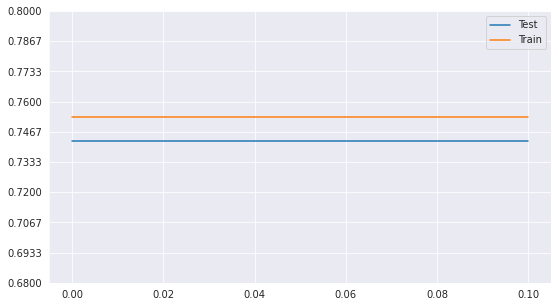

In [456]:
plt.figure(figsize=(9,5))

sns.lineplot(x=lr, y=test, label='Test')
sns.lineplot(x=lr, y=train, label='Train')
plt.yticks(np.linspace(0.68,0.8,10))
plt.show()

In [ ]:
X_train.head()

In [459]:
from xgboost import XGBClassifier

lr = np.linspace(0.0,0.5, 100)
test = []
train= []

for i in lr:

  prub = XGBClassifier(max_depth=25, learning_rate=i, n_estimators=27, booster='gbtree', gamma=3, subsample=0.5
                       , colsample_bytree=0.6, random_state=2, min_child_weight=22)
  
  prub.fit(X_train, y_train)

  predd = prub.predict(X_test)
  predd2 = prub.predict(X_train)

  test.append(accuracy_score(y_test, predd))
  train.append(accuracy_score(y_train, predd2))

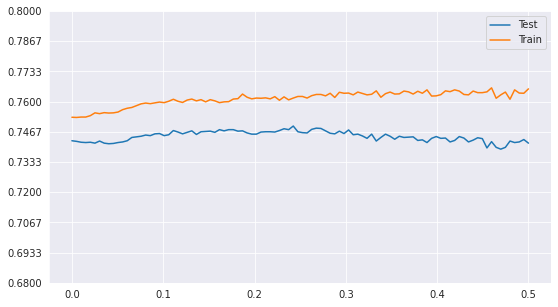

In [460]:
plt.figure(figsize=(9,5))

sns.lineplot(x=lr, y=test, label='Test')
sns.lineplot(x=lr, y=train, label='Train')
plt.yticks(np.linspace(0.68,0.8,10))
plt.show()

In [ ]:
np.max(test)